In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

# Flip a coin : Reality vs Theory

## 1. Four flips

Quick reminder : a probability of 0 means an event will never occur. A probability of 1 means it will happen for sure.

Let's start smoothly : Suppose we flip a coin 4 times. Can you answer the following questions :
- How many possible outcomes could happen?
- What's the probability to get 4 heads?
- What's the probability to get 2 heads and 2 tails?

To answer these "easy" questions, you could count the number of ways to get a result. For example, there are 16 possible outcomes and there are 6 ways to get 2 heads and 2 tails :
- 1 1 0 0
- 1 0 1 0
- 1 0 0 1
- 0 1 1 0
- 0 1 0 1
- 0 0 1 1

where 1 represents heads and 0 tails. Let's call __A__ the event where we get 2 heads and 2 tails. That means that the probability of A is P(A) = 6/16 = 0.375. But if the number of flips is larger, it becomes more difficult to manually count the different possibilities.

Mathematically, the number of ways to get $x$ heads (or tails) in $n$ flips could be calculated as :

$\large possibilities = \frac{n!}{x! (n - x)!}$

where $n!$ means factorial of n : $4! = 4 \times 3 \times 2 \times 1 = 24$

and can be accessed with [`math.factorial()`](https://docs.python.org/3/library/math.html)

❓ For this exercise, implement the functions below.   
When comfortable with your solutions, add them in `flip_coins_factorial.py` and try to pass the tests with `Make`.

In [2]:
import math

In [3]:
def count_possibilities(n_toss, n_heads):
    '''TO DO: return the number of possibilities to get n_heads when flipping the coin n_toss times
        Ex: count_possibilities(4, 4)  = 1'''
    return (math.factorial(n_toss)/math.factorial(n_heads)*math.factorial(n_toss - n_heads))

In [4]:
def count_total_possibilities(n_toss):
    '''TO DO: return the total amount of different combinations when flipping the coins n_toss times
        Ex: count_total_possibilities(3) = 8'''
    return 2 ** n_toss

In [10]:
def probability(n_toss):
    '''TO DO: return a dictionary. The keys will be the possible number of heads in each game,
            so they can't be over `n_toss` or under 0. The values for each of those keys will correspond
            to the probability of a game ending with that result.
      probability(5) = {0: ..., 1:..., 2:..., 3:..., 4:..., 5:...}'''
    proba = {}
    for toss in range(n_toss+1):
        proba[toss] = count_possibilities(n_toss, toss)/count_total_possibilities(n_toss)
    return proba

## 2. Theory : What could we expect?

We will flip a coin (each flip has an equal chance of coming up as heads or tails). This kind of experiment has no memory, in other words, each flip is **independent**. Even though there is no way to predict what will be the next flip, if we flip a coin a number of times, the laws of probability allow us to predict the probability of obtaining various results. The accuracy will be greater as the number of flips increases.

In [11]:
# TO DO: import your functions from flip_coin_factorial.py
from flip_coin_factorial import count_possibilities, count_total_possibilities, probability

Let's see how the probability behaves as we make more and more flips. 

❓ In a histogram, plot the output of `probability(n_toss)` with different values for `n_toss`.

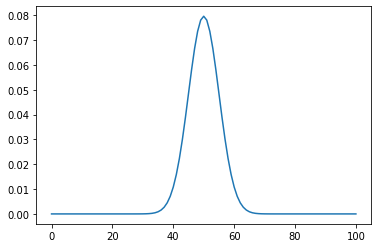

In [26]:
# TO DO HERE: plot the result of your probability function with a histogram.
x, y = zip(*(probability(100).items())) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

If your implementation is correct, the more flips you do (n_toss increases), the smoother the graph becomes as it approaches the “bell curve”, or **normal distribution**. Try For example `n_toss = 100`

## 3. In practice, do we get the same results?

You've already made big strides. But at this point, we could ask ourselves: does the real world behave this way? Again, let's use the power of Python to answer this question.

❓ For this exercise, implement the two functions below.  
When comfortable with your results, copy them inside `simulate_reality.py` and test them with `make`

### 3.1 `play_one_game(n_toss)`

One game consists of flipping a coin `n_toss` times. This function should return the number of heads you get. 

One way to do that is by randomly choosing an integer between 0 (tails) and 1 (heads). If you get 1, you increment your `heads_counter` otherwise it stays the same. Your function should return the `heads_counter`. 

```python
import random
random.randint(0, 1) # use this to pass the make tests
```

In [117]:
import random
def play_one_game(n_toss):
    '''TO DO: return the number of heads after n_toss'''
    heads_counter = 0
    for toss in range(n_toss):
        if random.randint(0, 1) == 1:
            heads_counter +=1
    return heads_counter

### 3.2 `play_n_game(n_games, n_toss)`

Imagine you repeat the previous game `n_games` times.

The goal here is to play a bunch of flip coin games and see the distribution of the values we get from flipping a coin `n_toss` times.

This new function will call your previously defined `play_one_game` function `n_games` times. Then, we want to keep track of the end result of each game played this way.

`play_n_game` should return a dictionary. The keys will be the possible `head_counter` of each game, and the values will correspond to the ratio of games ending with that number of heads.

EX : Imagine you play 10 coin flip games (n_games = 10) where in each game you flip the coin 6 times (n_toss = 6) and you get  
- 0 games showing 0 heads  
- 1 game showing 1 head  
- 3 games showing 2 heads  
- 3 games showing 3 heads  
- 2 games showing 4 heads  
- 1 game showing 5 heads  
- 0 games showing 6 heads
    
```python
=> result = {0:0/n_games, 
             1:1/n_games,
             2:3/n_games,
             3:3/n_games,
             4:2/n_games,
             5:1/n_games,
             6:0/n_games }
```

In [137]:
from collections import Counter

In [144]:
def play_n_game(n_games, n_toss):
    """TO DO: return a dictionary.
    The keys will be the possible head counts of each game
    The values will correspond to the probability of a game ending with that number of heads.
    """
    random.seed(1)
    head_counter = [play_one_game(n_toss) for game in range(n_games+1)]
    print(len(head_counter), head_counter)
    print(np.bincount(head_counter, minlength=n_toss+1), Counter(head_counter))
    return dict(zip(np.arange(n_toss+1), np.bincount(head_counter, minlength=n_toss+1)/n_games))

In [145]:
play_n_game(10, 6)#[1]

11 [3, 3, 4, 1, 3, 3, 3, 4, 4, 4, 3]
[0 1 0 6 4 0 0] Counter({3: 6, 4: 4, 1: 1})


{0: 0.0, 1: 0.1, 2: 0.0, 3: 0.6, 4: 0.4, 5: 0.0, 6: 0.0}

In [136]:
np.arange(6+1)

array([0, 1, 2, 3, 4, 5, 6])

### 3.3 Visualize practice results

❓ Import your validated functions from `simulate_reality.py` and plot the result as histogram.

Just as before, try different values for `n_toss` and `n_games`. What do you observe?

Compare these two graphs (with the same value for `n_toss`). What do you observe?

## 4. Compare results with Mean Squared Error (MSE)

If you have a look at the 2 graphs (theory vs reality), you should notice that they both look like a normal distribution. But as usual, we need a proof, we need a number to confirm this intuition.

❓ Implement the function `mean_squared_error(n_games, n_toss)` below and test it in the `comparison.py` file. 
This function should simply return the squared error between the theoretical and "actual" results (obtained through simulation). 
Copy your code in `comparison.py` and check your result with `make`

In [121]:
from flip_coin_factorial import probability
from simulate_reality import play_n_game
def mean_squared_error(n_games, n_toss):
    '''TO DO: return the squared error between the theoretical and "actual" results (obtained through simulation)'''
    pass

In [ ]:
# Show the RMSE instead as it is easier to interpret
print('RMSE:', '{:.2f}'.format(mean_squared_error(10,10)**0.5*100), '%')